In [115]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [116]:
os.chdir("wine_data/")
red_df = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
white_df = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')
print("White Wine Shape : ",white_df.shape)
print("Red Wine Shape : ",red_df.shape)

White Wine Shape :  (4898, 12)
Red Wine Shape :  (1599, 12)


In [117]:
print("White Data Columns : \n",white_df.columns)
print("\nRed Data Columns : \n",red_df.columns)

White Data Columns : 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Red Data Columns : 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [118]:
white_df['type'] = 'white'
red_df['type'] = 'red'
wine_df = pd.concat([white_df, red_df])

In [119]:
print("Wine Data Shape :",wine_df.shape)
print("\nWine Data Columns : \n",wine_df.columns)

Wine Data Shape : (6497, 13)

Wine Data Columns : 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


In [120]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [121]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [122]:
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
wine_df['quality'] = wine_df['quality'].map(recode)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,white


In [123]:
wine_df['quality'].value_counts()

1    4113
0    2384
Name: quality, dtype: int64

In [124]:
recode = {'white':0 ,'red':1}
wine_df['type'] = wine_df['type'].map(recode)
wine_df = wine_df[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [125]:
wine_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

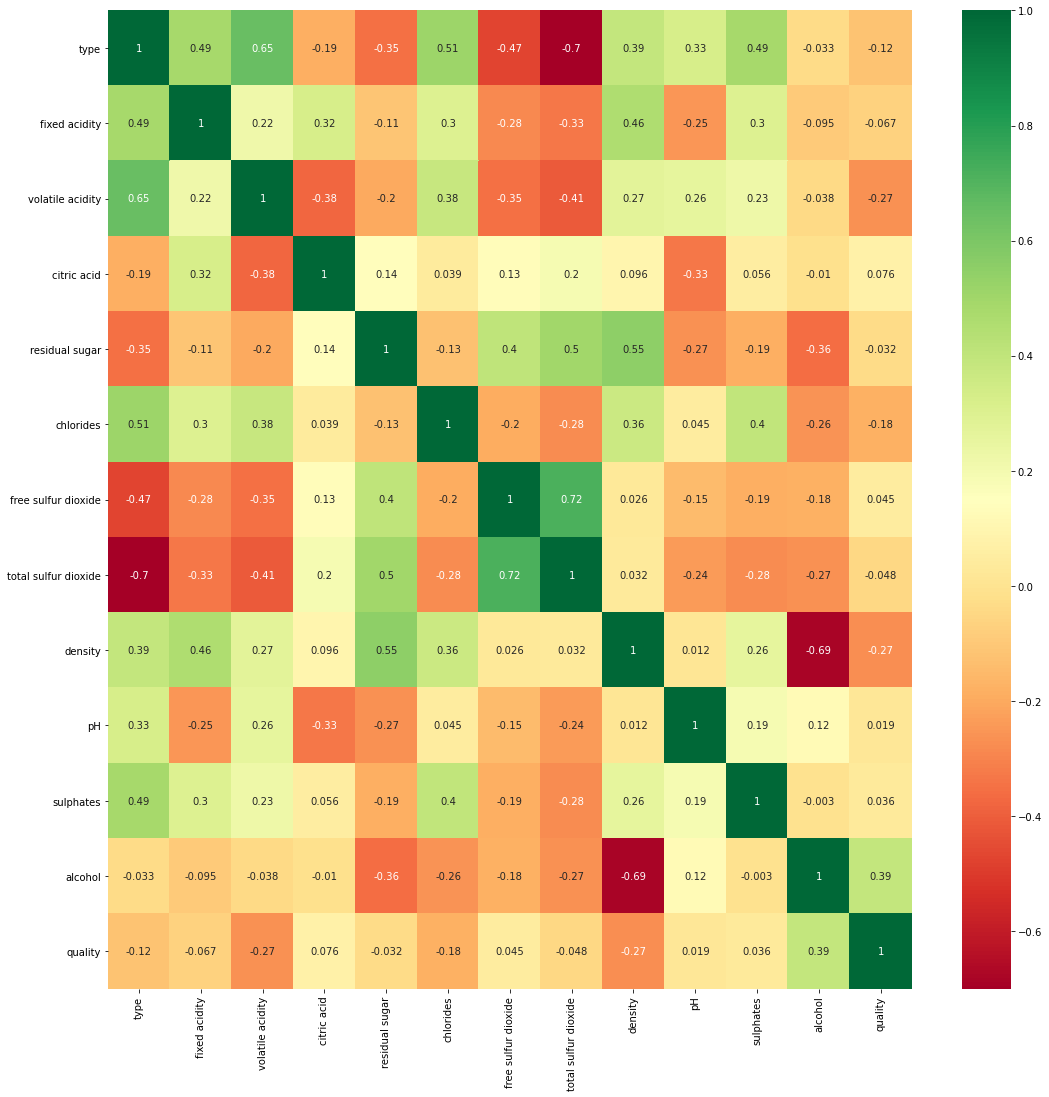

In [126]:
plt.figure(figsize=(18,18))
sns.heatmap(wine_df.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [127]:
X = wine_df.drop(['quality'], axis = 1) 
y = wine_df['quality']

In [128]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [129]:
#Splitting the data into test and train set
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size=0.2, random_state=25)

In [130]:
os=RandomOverSampler(1)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 3316, 0: 1881})
The number of classes after fit Counter({0: 3316, 1: 3316})


C:\Users\abhis\anaconda3\envs\solo\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [53]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_ns, y_train_ns, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.729950 (0.011827)
LDA: 0.731006 (0.012275)
KNN: 0.782573 (0.009928)
DTC: 0.863238 (0.013546)
SVM: 0.780160 (0.010730)
RFC: 0.897016 (0.009011)
ABC: 0.743670 (0.015412)
XGB: 0.876055 (0.012252)


In [54]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(3, 30, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

rf_params = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'criterion' : ['gini', 'entropy'],
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'min_samples_leaf' : min_samples_leaf}

print(rf_params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 9, 16, 23, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [56]:
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_params,
                                       scoring= 'roc_auc',
                                       n_jobs= -1, verbose= 3)

rf_random_search.fit(X_train_ns, y_train_ns)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 9, 16, 23, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='roc_auc', verbose=3)

In [57]:
rf_random_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'entropy'}

In [60]:
tuned_rf_classifier = RandomForestClassifier(n_estimators = 800,
                                             min_samples_split = 2,
                                             min_samples_leaf = 1,
                                             max_features = 'log2',
                                             max_depth = 16, 
                                             criterion = 'entropy')

tuned_rf_classifier.fit(X_train_ns, y_train_ns)
y_pred_tuned_rf = tuned_rf_classifier.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(accuracy_tuned_rf)

0.8138461538461539


In [62]:
rf = RandomForestClassifier()
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [69]:
y_pred_tuned_rf = rf.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(accuracy_tuned_rf)

0.8146153846153846


In [97]:
learning_rate = [float(x*0.01) for x in np.linspace(5, 100, num=10)]
max_depth = [int(x) for x in np.linspace(3, 60, num=10)]
gamma =  [float(x*0.1) for x in np.linspace(1, 10, num=10)]
colsample_bytree = [float(x*0.1) for x in np.linspace(1, 10, num=10)]

xgb_params={
 "learning_rate" : learning_rate ,
 "max_depth" : max_depth,
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma" : gamma,
 "colsample_bytree" : colsample_bytree 
}
print(xgb_params)

{'learning_rate': [0.05, 0.15555555555555556, 0.2611111111111111, 0.36666666666666664, 0.4722222222222222, 0.5777777777777778, 0.6833333333333333, 0.7888888888888889, 0.8944444444444445, 1.0], 'max_depth': [3, 9, 15, 22, 28, 34, 41, 47, 53, 60], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0], 'colsample_bytree': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]}


In [133]:
from sklearn.model_selection import GridSearchCV

xgb_random_search =  GridSearchCV(XGBClassifier(), param_grid = xgb_params,
                                       scoring= 'roc_auc',
                                       n_jobs= -1, cv = 10, verbose = True)

xgb_random_search.fit(X_train_ns.head(1000), y_train_ns.head(1000))

Fitting 10 folds for each of 40000 candidates, totalling 400000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   13.0s


KeyboardInterrupt: 

In [104]:
xgb_random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 28,
 'learning_rate': 0.4722222222222222,
 'gamma': 0.7000000000000001,
 'colsample_bytree': 0.8}

In [105]:
xgb_classifier = XGBClassifier(min_child_weight = 3,
                              max_depth = 28,
                              learning_rate = 0.4722222222222222,
                              gamma = 0.7000000000000001,
                              colsample_bytree = 0.8)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)

0.8084615384615385


In [132]:
xx = X_train_ns.head(1000)
yy = y_train_ns.head(1000)

In [131]:
X_train_ns

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,8.2,0.240,0.30,2.30,0.050,23.0,106.0,0.99397,2.98,0.50,10.0
1,1,12.0,0.500,0.59,1.40,0.073,23.0,42.0,0.99800,2.92,0.68,10.5
2,0,6.7,0.160,0.28,2.50,0.046,40.0,153.0,0.99210,3.38,0.51,11.4
3,0,7.4,0.350,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9
4,0,7.8,0.390,0.26,9.90,0.059,33.0,181.0,0.99550,3.04,0.42,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6627,0,7.9,0.345,0.51,15.30,0.047,54.0,171.0,0.99870,3.09,0.51,9.1
6628,1,9.0,0.820,0.14,2.60,0.089,9.0,23.0,0.99840,3.39,0.63,9.8
6629,0,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.9
6630,0,8.0,0.550,0.17,8.20,0.040,13.0,60.0,0.99560,3.09,0.30,9.5
